# Carregando bibliotecas necessárias

In [1]:
#manupulação de dados em tabelas
import pandas as pd 
#plots de gráficos
import matplotlib.pyplot as plt
#manupalação de vetores
import numpy as np 

#biblioteca spacy
import spacy
#OBS: Caso não tenha o pacote em português, execute no terminal o comando: python3 -m spacy download pt

# biblioteca string - Nativa do python
import string 

#Os stop words são oriundo da biblioteca spacy
from spacy.lang.pt.stop_words import STOP_WORDS

In [2]:
pln=spacy.load('pt_core_news_sm')

# Stop Words

In [3]:
stop_words=list(STOP_WORDS)
# amostra de 100 stop_words para a lingua portuguesa
print(stop_words[0:100])

['tu', 'cada', 'dos', 'desta', 'têm', 'seria', 'nós', 'nunca', 'desde', 'nuns', 'onze', 'podia', 'número', 'oito', 'este', 'aí', 'tivestes', 'vens', 'pois', 'teus', 'diante', 'ali', 'iniciar', 'a', 'deste', 'sem', 'cedo', 'dezanove', 'vocês', 'como', 'dentro', 'próprio', 'quinta', 'ir', 'tentar', 'vem', 'são', 'fazer', 'poder', 'tuas', 'posso', 'baixo', 'tudo', 'estive', 'sou', 'ainda', 'vários', 'ter', 'devem', 'tal', 'te', 'possivelmente', 'certeza', 'somos', 'nossa', 'teu', 'nenhuma', 'porém', 'bom', 'meu', 'podem', 'veja', 'vinda', 'cima', 'vossa', 'pelo', 'essa', 'geral', 'meio', 'lá', 'foi', 'naquele', 'posição', 'temos', 'de', 'estiveram', 'tipo', 'tenho', 'contudo', 'faz', 'daquele', 'outras', 'sim', 'obrigada', 'mais', 'sexta', 'certamente', 'pelos', 'fazia', 'quer', 'demais', 'maior', 'vão', 'quem', 'ele', 'pode', 'estão', 'logo', 'ser', 'esses']


# Pontuações

In [4]:
# lista de pontuações
pontuacoes=string.punctuation
pontuacoes=pontuacoes+'...'+' ' # Adiciona elementos a lista de pontuacoes
print(pontuacoes)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~... 


In [5]:
def processamento(texto):
    # texto em minuscula
    texto=texto.lower()
    documento=pln(texto)
    
    #removendo stop words
    lista_tokens_1=[]
    for p in documento:
        if (p.text in stop_words)==False:
            lista_tokens_1.append(p)
    #removendo pontuações      
    lista_tokens_2=[]
    for p in lista_tokens_1:
        if (p.text in pontuacoes)==False:
            lista_tokens_2.append(p)
    #lematização de tokens        
    lista_tokens_3=[]
    for p in lista_tokens_2:
        lista_tokens_3.append(p.lemma_)

    return lista_tokens_3

In [6]:
texto_exemplo='Os funcionários foram muito prestativos e amigáveis. A entrega, entretanto, demorou muito e o pedido chegou frio!'

In [7]:
processamento(texto_exemplo)

['funcionário',
 'prestativo',
 'amigável',
 'entregar',
 'entretanto',
 'demorar',
 'pedir',
 'chegar',
 'frio']

# Base de comentários

In [8]:
reviews=pd.read_csv('reviews.csv')

In [9]:
# amostra da tabela
reviews.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId,sentiment
0,gp:AOqpTOGQh99TsMkEKOwZfx7Ta42LpvVJfGU9_JojIsp...,Kelly Cristina Ribeiro,https://play-lh.googleusercontent.com/a/AATXAJ...,Há algum tempo parei de comprar no outros app ...,1,207,9.145.1,2022-03-16 14:48:33,NaN,NaN,most_relevant,br.com.brainweb.ifood,0
1,gp:AOqpTOG6WAGo0zxa8ex0SEyhXhKWdvWYqPqGjGqczJR...,B. H.,https://play-lh.googleusercontent.com/a-/AOh14...,Hoje tive a pior experiência possível. Meu ped...,1,150,9.146.0,2022-03-16 16:41:11,NaN,NaN,most_relevant,br.com.brainweb.ifood,0
2,gp:AOqpTOEM341uvjijHacN3bCQwRIcHUKu9b3xp91iiY1...,Elisana Camila,https://play-lh.googleusercontent.com/a-/AOh14...,"Tá difícil Ifood, tentei usar um cupom ontem e...",1,691,9.143.0,2022-03-02 09:49:16,NaN,NaN,most_relevant,br.com.brainweb.ifood,0
3,gp:AOqpTOFbVNtkV_C76raZj-PS9an_DgOgS8_wSJGe12u...,Evelin Samanta,https://play-lh.googleusercontent.com/a/AATXAJ...,"Não consigo comprar cupons, participar das pro...",1,11,9.145.1,2022-03-14 21:20:51,NaN,NaN,most_relevant,br.com.brainweb.ifood,0
4,gp:AOqpTOGRaJO4bcPRiX_H18VCTLryXgCExMCUgmcNCE9...,Thalita Sueko Hatakeyama,https://play-lh.googleusercontent.com/a-/AOh14...,"Só funciona com dados móveis, não sei o que es...",1,6,9.145.1,2022-03-16 21:28:42,NaN,NaN,most_relevant,br.com.brainweb.ifood,0


In [10]:
# padronizando datas
reviews['at']=pd.to_datetime(reviews['at'])

In [11]:
# encontrando o ano de publicação
ano=[]
for i in range(len(reviews)):
    ano.append(reviews['at'].iloc[i].year)
reviews['ANO']=ano

In [12]:
# Frequencia de comentário por ano
reviews['ANO'].value_counts()

2022    10892
2021     7304
2020     2996
2019     1399
2018      203
Name: ANO, dtype: int64

# Estudo de comentários com apenas notas iguais a 1

In [13]:
reviews_1=reviews[(reviews['score']==1)&(reviews['ANO']==2020)][['content','score']].reset_index(drop=True).copy()

In [14]:
reviews_1

,content,score
0,O aplicativo está terrível. Cadastro burocráti...,1
1,App bem fraco. O app é em webview muito mal di...,1
2,"O restaurante abusa do volume de notificações,...",1
3,"O aplicativo é impossível de usar, não condiz ...",1
4,Bastante decepcionante. O app não encontra meu...,1
...,...,...
115,Logo no meu primeiro pedido já tive uma péssim...,1
116,Ótimo pra quem não tem tempo de fazer a própri...,1
117,Já no primeiro dia de uso não funciona. Tentei...,1
118,No aplicativo marca um horário com o tempo máx...,1


In [15]:
#Carregando todo o conteudo 
conteudo1=''
for texto in reviews_1['content'].values:
    conteudo1=conteudo1+' '+ texto

In [16]:
#aplicando a funcao de processamento de texto 
resultado1=processamento(conteudo1)

In [17]:
contagem_token=pd.Series(resultado1).value_counts()

Text(0.5, 1.0, 'Top 30 - Tokens revelantes para comentários com notas iguais a 1')

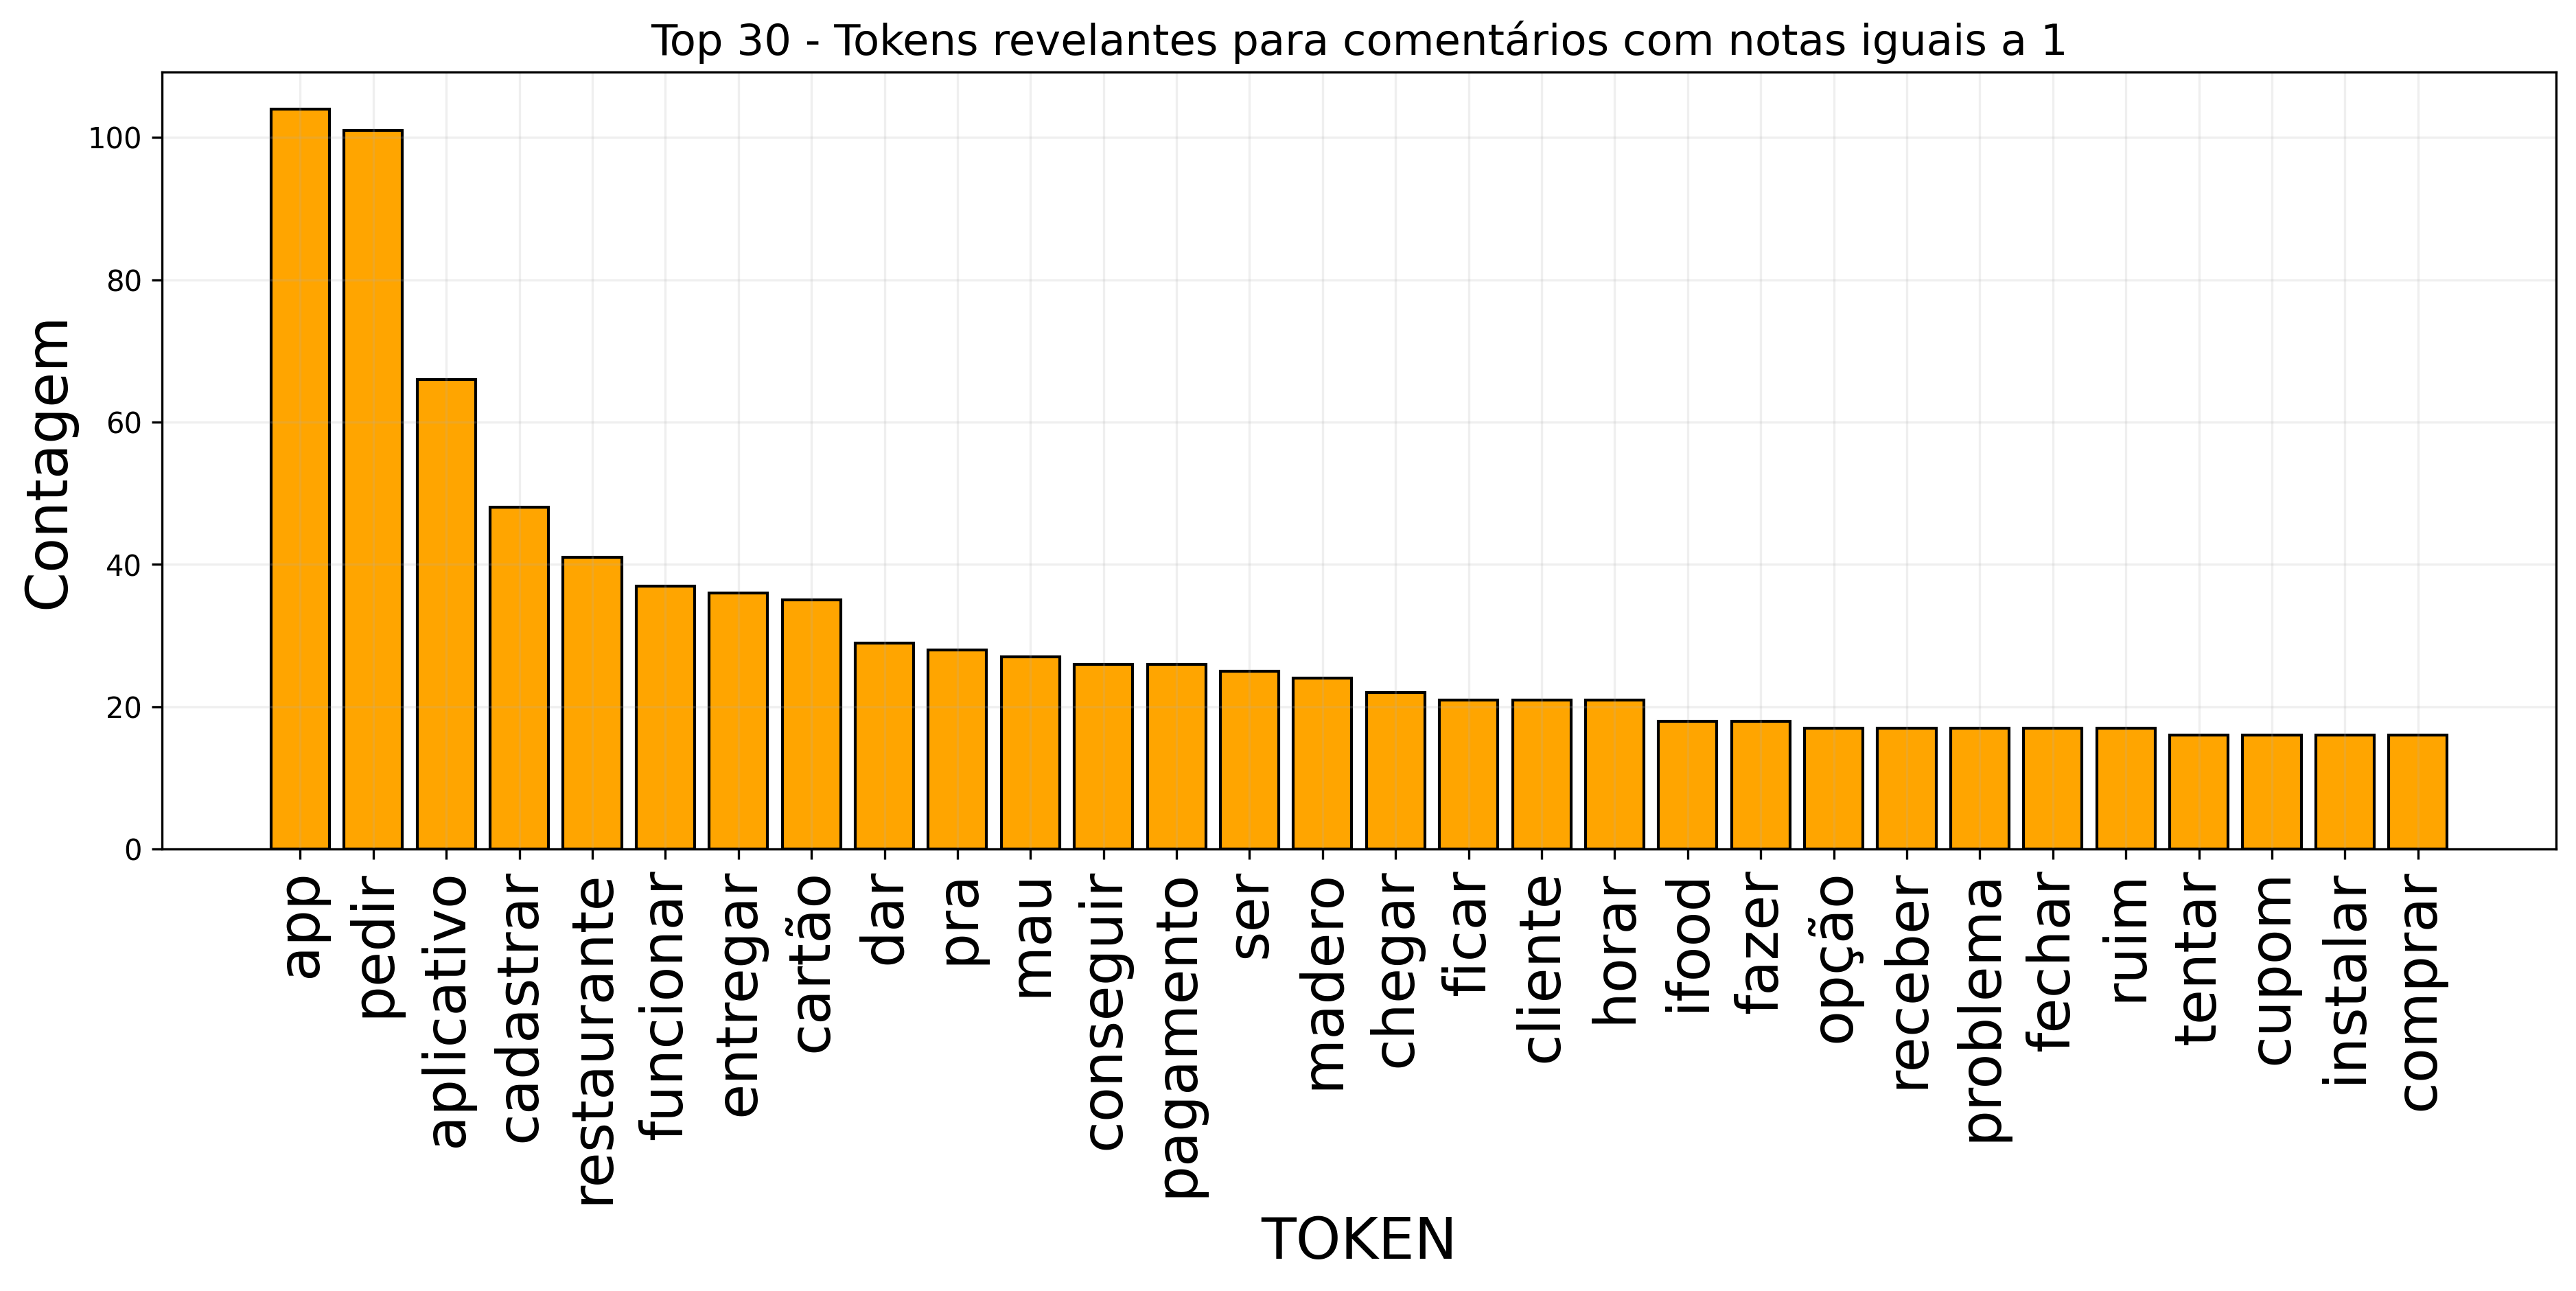

In [18]:
plt.figure(figsize=(15,5),dpi=300)
plt.bar(contagem_token.index[0:30],contagem_token.values[0:30],color='orange',edgecolor='black')
plt.xticks(rotation=90,fontsize=20)
plt.grid(alpha=0.2)
plt.xlabel('TOKEN',fontsize=20)
plt.ylabel('Contagem',fontsize=20)
plt.title('Top 30 - Tokens revelantes para comentários com notas iguais a 1',fontsize=15)